In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
### Question 1 ###

In [3]:
class StandardScaler:
    def __init__(self):
        self.mean = None
        self.std = None
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
    def transform(self, X):
        return (X-self.mean)/self.std
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [4]:
class SLP:
    def __init__(self, alpha=0.1, epoch=100):
        np.random.seed(42)
        self.alpha = alpha
        self.epoch = epoch
        self.w= np.random.uniform(size=2)
        self.b= np.random.uniform()
        self.error=[]
        self.accuracy=[]
        
    def fit(self, X, y):
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64)
        for _ in range(self.epoch):
            y_pred = self.predict(X)
            err = y - y_pred
            self.error.append(sum(err**2)/len(y))
            self.w+=self.alpha * np.dot(X.T, err)
            self.b+=self.alpha * np.sum(err)
            self.accuracy.append(np.mean(y == y_pred))
            
    def predict(self, X):
        X = np.array(X, dtype=np.float64)
        z = np.dot(X, self.w)+self.b
        y_hat = 1/(1+np.exp(-z))
        y_pred = np.where(y_hat > 0.5, 1, 0)
        return y_pred
    
    def describe(self):
        return [self.w[0], self.w[1], self.b]


In [5]:
iris = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, 
        names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
scaler = StandardScaler()  
df = iris.replace({'class':{'Iris-virginica':0, 'Iris-versicolor':1}}).copy()
df = df.drop(df[df['class']=='Iris-setosa'].index, axis=0).sample(100,random_state=42)
df.loc[:,:'petal_width'] = scaler.fit_transform(df.loc[:,:'petal_width'])


train = df.sample(frac=0.8)
test = df.drop(train.index)

trainX, train_y = train.iloc[:, 1:5], train['class'].values
testX, test_y = test.iloc[:, 1:5], test['class'].values
combs = []
for i in range(4):
    for j in range(i+1, 4):
        combs.append((i, j))

train_X = [trainX.iloc[:,[i,j]].values for i, j in combs]
test_X = [testX.iloc[:, [i, j]].values for i, j in combs]
print(df)

     sepal_length  sepal_width  petal_length  petal_width class
133      0.057618    -0.217468      0.236171    -0.416431     0
103      0.057618     0.084571      0.844858     0.293394     0
120      0.967382     0.990688      0.966595     1.476436     0
95      -0.852145     0.386610     -0.859466    -1.126256     1
94      -1.003773    -0.519507     -0.859466    -0.889647     1
..            ...          ...           ...          ...   ...
110      0.360873     0.990688      0.236171     0.766611     0
121     -1.003773    -0.217468     -0.007304     0.766611     0
64      -1.003773     0.084571     -1.589891    -0.889647     1
142     -0.700518    -0.519507      0.236171     0.530003     0
101     -0.700518    -0.519507      0.236171     0.530003     0

[100 rows x 5 columns]


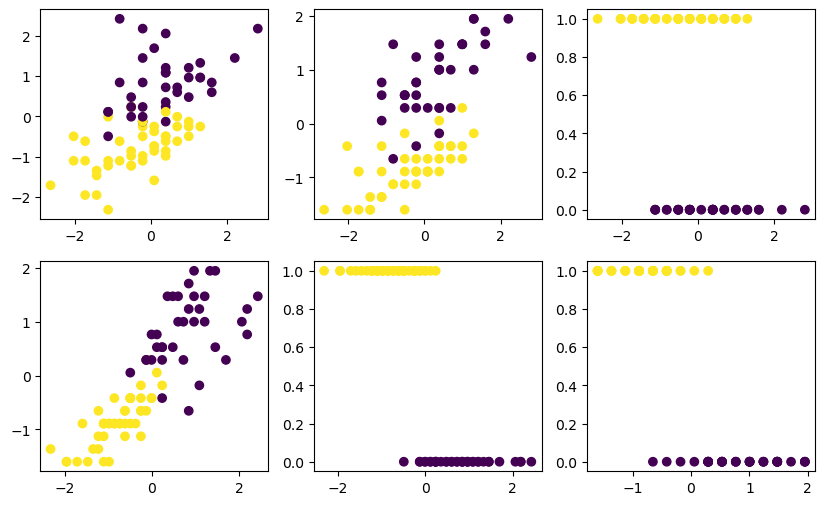

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    ax.scatter(train_X[i][:, 0], train_X[i][:, 1], c=train_y)

[0.275, 0.825, 0.8375, 0.85, 0.9, 0.925, 0.9125, 0.9125, 0.925, 0.9125, 0.925, 0.925, 0.9125, 0.9125, 0.9125]
[0.2125, 0.8625, 0.9125, 0.9125, 0.9125, 0.9125, 0.9125, 0.9375, 0.9375, 0.9375, 0.925, 0.925, 0.9125, 0.925, 0.9125]
[0.55, 0.45, 0.8, 0.8875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.1875, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.95, 0.95, 0.95, 0.95, 0.95]
[0.55, 0.575, 0.9625, 0.9625, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875, 0.9875]
[0.55, 0.6125, 0.9625, 0.9625, 0.975, 0.975, 0.975, 0.975, 0.9875, 0.9875, 0.9875, 0.9875, 0.975, 0.9875, 0.9875]


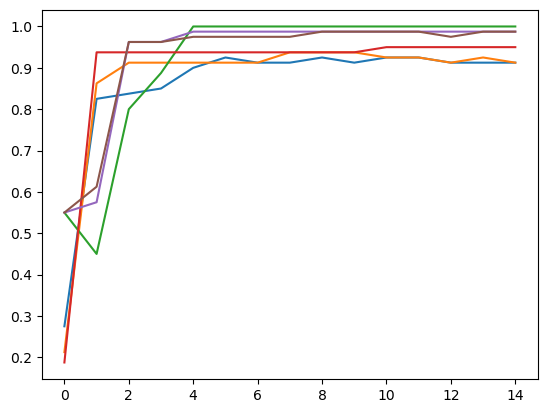

In [7]:
slp = [SLP(alpha=0.5, epoch=15) for i in range(6)]
for i in range(6):
    slp[i].fit(train_X[i], train_y)
    print(slp[i].accuracy)
    plt.plot(np.arange(0, slp[i].epoch), slp[i].accuracy)

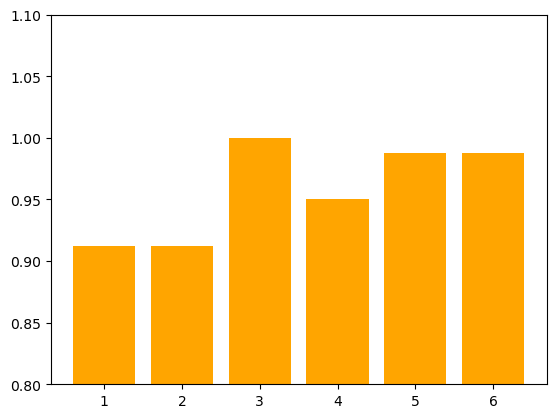

In [8]:
total_acc = [slp[i].accuracy[-1] for i in range(6)]
label = ['1','2','3','4','5','6']
plt.bar(label, total_acc, color = 'orange')
plt.ylim(0.8, 1.1)
plt.show()

In [9]:
### Question 2 ###

In [10]:
# one hot encoding

class OneHotEncoder:
    def __init__(self):
        self.categories = None

    def fit(self, y):
        self.categories = np.unique(y)

    def transform(self, y):
        return np.array([self.categories == val for val in y]).astype(int)

    def fit_transform(self, y):
        self.fit(y)
        return self.transform(y)

In [11]:
class Sigmoid:
    def __call__(self, x):
        return 1 / (1 + np.exp(-x))

    def grad(self, x):
        return self.__call__(x) * (1 - self.__call__(x))

class Softmax:
    def __call__(self, x):
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)

    def grad(self, x):
        p = self.__call__(x)
        return p * (1 - p)
    
class ReLU:
    def __init__(self):
        pass

    def __call__(self, x):
        return np.maximum(0, x)

    def grad(self, x):
        return np.where(x > 0, 1, 0)

class CrossEntropy:
    def __call__(self, y_true, y_pred):
        return -np.sum(y_true * np.log(y_pred)) / len(y_true)

    def grad(self, y_true, y_pred):
        return y_pred - y_true


In [12]:
class Dense:
    def __init__(self, n_inputs, n_neurons, weights=None, bias=None):
        np.random.seed(42)
        self.weights = weights if weights is not None else np.random.randn(n_inputs, n_neurons) * np.sqrt(1 / n_inputs)
        self.bias = bias if bias is not None else np.random.randn(1, n_neurons) * 0.1
        self.output = None
        self.error = None

    def __call__(self, x):
        self.output = np.dot(x, self.weights) + self.bias
        return self.output
    
    def grad(self, error):
        self.error = error
        return np.dot(error, self.weights.T)
    
    def update(self, lr):
        self.weights -= lr * np.dot(self.error, self.output.T)
        self.bias -= lr * np.sum(self.error, axis=0)

In [13]:
class Model:
    def __init__(self, input_nodes, hidden_nodes, output_nodes):
        self.layer1 = Dense(input_nodes, hidden_nodes)
        self.layer1_activation = ReLU()
        self.layer2 = Dense(hidden_nodes, output_nodes)
        self.layer2_activation = Softmax()
        self.loss = CrossEntropy()

    def __call__(self, x):
        x = self.layer1(x)
        x = self.layer1_activation(x)
        x = self.layer2(x)
        x = self.layer2_activation(x)
        return x
    
    def backward(self, x, y_true, y_pred, lr):
        error = self.loss.grad(y_true, y_pred)
        error = self.layer2_activation.grad(error)
        error = self.layer2.grad(error)
        error = self.layer1_activation.grad(error)
        error = self.layer1.grad(error)
        self.layer2.update(lr)
        self.layer1.update(lr)

    def train(self, x, y_true, lr):
        y_pred = self(x)
        loss = self.loss(y_true, y_pred)
        self.backward(x, y_true, y_pred, lr)
        return loss
    
    def evaluate(self, x, y_true):
        y_pred = self(x)
        return np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_true, axis=1))
    
    def predict(self, x):
        y_pred = self(x)
        return np.argmax(y_pred, axis=1)

In [14]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

train_idx = np.random.choice(range(len(X)), int(len(X) * 0.8), replace=False)
test_idx = list(set(range(len(X))) - set(train_idx))

X_train = X[train_idx]
y_train = y[train_idx]
X_test = X[test_idx]
y_test = y[test_idx]

In [15]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

y_train = OneHotEncoder().fit_transform(y_train)
y_test = OneHotEncoder().fit_transform(y_test)

In [16]:
model1 = Model(4, 7, 3)

epochs = 100
lr = 0.00001

epoch_losses = []
losses =[]
for epoch in range(epochs):
    for i in range(len(X_train)):
        loss = model1.train(X_train[i:i+1], y_train[i:i+1], lr)
        losses.append(loss)
    #print(f'Epoch {epoch + 1}/{epochs}, Loss: {np.mean(losses)}')
    epoch_losses.append(np.mean(losses))
    losses = []

print(f'Train Accuracy: {model1.evaluate(X_train, y_train):.4f}')
print(f'Test Accuracy: {model1.evaluate(X_test, y_test):.4f}')

Train Accuracy: 0.6667
Test Accuracy: 0.6667


In [ ]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
X = df.iloc[:,1:12].values
y = df.iloc[:,0].values

train_idx = np.random.choice(range(len(X)), int(len(X) * 0.8), replace=False)
test_idx = list(set(range(len(X))) - set(train_idx))

X_train = X[train_idx]
y_train = y[train_idx]
X_test = X[test_idx]
y_test = y[test_idx]

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

y_train = OneHotEncoder().fit_transform(y_train)
y_test = OneHotEncoder().fit_transform(y_test)


In [ ]:
model2 = Model(np.shape(X_train)[1], 7, 3)

epochs = 100
lr = 0.0001

epoch_losses = []
losses =[]
for epoch in range(epochs):
    for i in range(len(X_train)):
        loss = model2.train(X_train[i:i+1], y_train[i:i+1], lr)
        losses.append(loss)
    #print(f'Epoch {epoch + 1}/{epochs}, Loss: {np.mean(losses)}')
    epoch_losses.append(np.mean(losses))
    losses = []

print(f'Train Accuracy: {model2.evaluate(X_train, y_train):.3f}')

In [ ]:
print(f'Test Accuracy: {model2.evaluate(X_test, y_test):.4f}')